In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = load_boston()

In [6]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [15]:
# Create the dataset
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['TARGET'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
# Check null
df.isnull().sum().sum()

0

In [19]:
# data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TARGET     float64
dtype: object

In [28]:
# Check for outlier
df.describe().iloc[1]/df.describe().iloc[5]

CRIM       14.087262
ZN               inf
INDUS       1.149306
CHAS             inf
NOX         1.031032
RM          1.012263
AGE         0.884837
DIS         1.183196
RAD         1.909881
TAX         1.237082
PTRATIO     0.968794
B           0.911184
LSTAT       1.113826
TARGET      1.062868
dtype: float64

<AxesSubplot:ylabel='Frequency'>

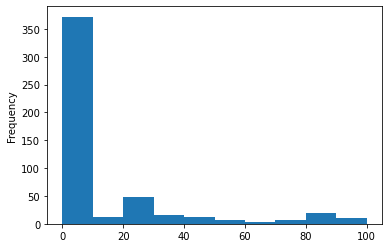

In [32]:
# Too many zeros
df['ZN'].plot(kind='hist')

- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

<AxesSubplot:ylabel='Frequency'>

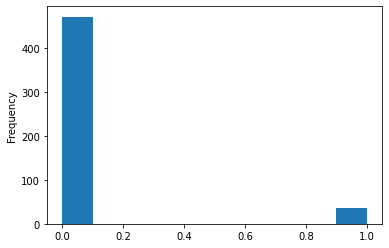

In [33]:
df['CHAS'].plot(kind='hist')

### CHAS is a binary variable
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

In [51]:
# Simple linear model
X = df.drop(columns=['TARGET'])
y = df['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(f"Train model Accuracy: {np.round(reg.score(X_train,y_train),2)}")
print(f"Test model Accuracy: {np.round(reg.score(X_test,y_test),2)}")

Train model Accuracy: 0.75
Test model Accuracy: 0.67


### New Data Prediction

In [60]:
reg.predict(X.iloc[0,:].values.reshape(1,-1))

array([29.95339638])

### Pickle the model

In [63]:
import pickle
pickle.dump(reg,open("regression_model.pkl",'wb'))